1. Your views about the problem statement?
This is the Classification problem. Model needs to predict Tommorrow it will Rain or not using other features. 
Dependent variable : RainTommorrow
Independent variable:MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am	Cloud3pm,Temp9am,Temp3pm,year,month,day.
Model can also be be designed to predict rainfall on specific date using earlier history.
Model can also be used to predict temprature of next day
People living in extremly cold region may buy newspaper to get more accurate weather prediction.
Editor wants to use only Ensemble method but it is better to check accurasy using other nonensemble techniques as well.

Owner needs to check other new content in which readers are intrested. Readers buy newpaper for the purpose of reading news than checking rain prediction. Data can be collected to check how much time reader has devoted reading on each page, in the form of star rating. Data can be collected in which regionwise so that more news related to perticular region can be focused.  


2. What will be your approach to solving this task?
I will try applying all models and check accuracy.
i)First step Datapreprocessing. We need to check whether dataset is balanced or not. For this we need to identify categorical and continous variables. Categorical variables can be checked using histogram and continous variables can be checked using box plot.If data is not balanced, we need to modify high end and lower end data ramge. 
If data contains null values we needs to replace null valuess with mean or mode.
ii)Second step is convert all categorical varibales into numerical values.Location is deleted as it has only single value and RainfallToday and RainfallTommorrow converted into 0/1.
iV)Next step is to find the corelation and multicolinearity. Pressure9am,Pressure3am shows very high multicolinearity, temprature3pm and hightemprature shows high multicoliniarity. Similarlry temprature 9am and temprature 3pm also shows high multicoliniar variables can be deleted if model overfits.  
v)Next is to divide dataset into training and testing set. We have used 80/20 ratio for this. 
vi)Next is to select set of classification models which can be applied.
vii)Next is to train the classification model with the training set and evaluation using test set. Compute Accuracy score, recall,precision to compare training model.
viii)
3. What were the available ML model options you had to perform this task?
All the classification models like LogisticRegression, classification tree,random forest,bagging, boosting, Adabost classifier,XGboost classifier can be used for such types of problems. I have solved by applying all the models and identified best one.
4. Which model’s performance is best and what could be the possible reason for that?
XGboost is giving the best training accuracy. However, test accuracy is much lower than training accuracy. Chances are their for overfitting. Hence we will not select XGboost.
All other models are giving nearly same accuracy. 
Non ensemble techniques are performing little low , as multicolinearity has not been removed from it. 
Gradient boost classifier shows better AUC values(Training and Testing) compared to other models. It also shows better classification score(Training and Testing) compared to other models. Hence Gradient Boost classifier is better option.

5. What steps can you take to improve this selected model’s performance even further?
Gradient Boost model can be further improved by changing model parameters using Gridsearch. 
Presently we are considering only 5 to 10 fearures, it can be increased more. 
Numer of trees can also be increased more to improve the accuracy.
learning rate can be varried further to improve the accuracy.
XGBoost is the advanced variation of Gradient Boost, so there is scope of improvement in the Gradient Boost

In [1]:
#load common liabraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
#load dataset
df=pd.read_excel("C:/archana/internshala/python/project/sydney_rain prediction.xlsx")


# Data Cleaning

In [3]:
#check for null values and datatypes
df.info()
# Many NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [4]:
print('unique values in Date',len(df['Date'].unique()))
print('unique values in RainToday',len(df['RainToday'].unique()))
print('unique values in RainTomorrow',len(df['RainTomorrow'].unique()))
      


unique values in Date 3337
unique values in RainToday 3
unique values in RainTomorrow 2


In [5]:
#unique values in Date(categorical variable) are too high so divide date in day month and year features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008,2,1
1,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008,2,2
2,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008,2,3
3,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008,2,4
4,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008,2,5


In [6]:
df1=df.copy()
null_mask = df1.isnull().any(axis=1)
null_rows = df1[null_mask]
print(len(null_rows))
# 660 row consist of null values . Hence deleting rows with null values is not a good option we may lose important information.
# replace null values in 'RainToday' with mode value of a data as it is a categorical feature
df1['RainToday'].fillna(df1['RainToday'].mode()[0],inplace=True)


660


In [7]:
#univariate Analysis
df1.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,2012.300869,6.413545,15.705424
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,2.761933,3.397846,8.795802
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,2008.000000,1.000000,1.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,2010.000000,3.000000,8.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,2012.000000,6.000000,16.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,2015.000000,9.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,2017.000000,12.000000,31.000000


<Axes: xlabel='Location', ylabel='count'>

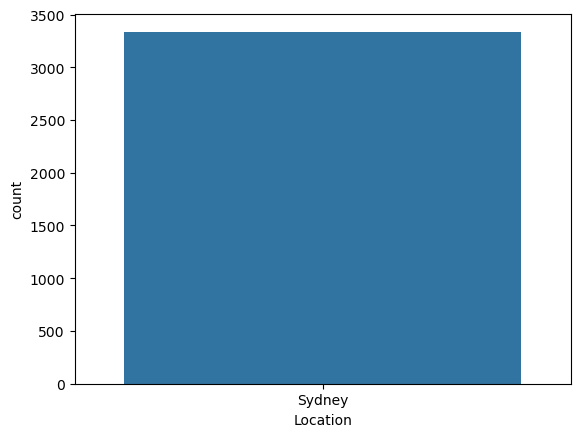

In [8]:
sns.countplot(x='Location',data=df1)
#Plot histogram of Location

In [9]:
#As location value is Sydney for whole data, it does not contribute in Decision problem and can be deleted
df1.drop('Location',axis=1,inplace=True)

<Axes: xlabel='RainToday', ylabel='count'>

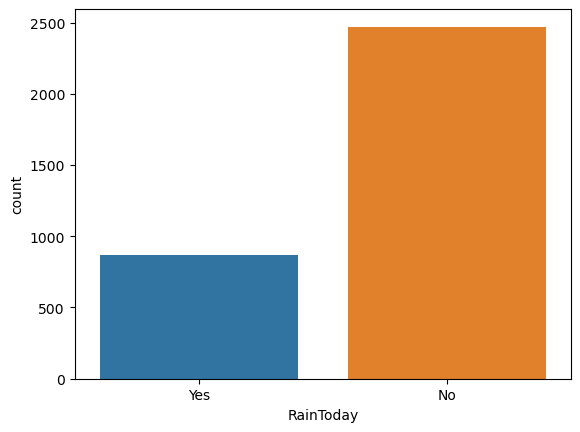

In [10]:
sns.countplot(x='RainToday',data=df1)
#Plot histogram of Location. It Shows little impbalanced data

<Axes: xlabel='RainTomorrow', ylabel='count'>

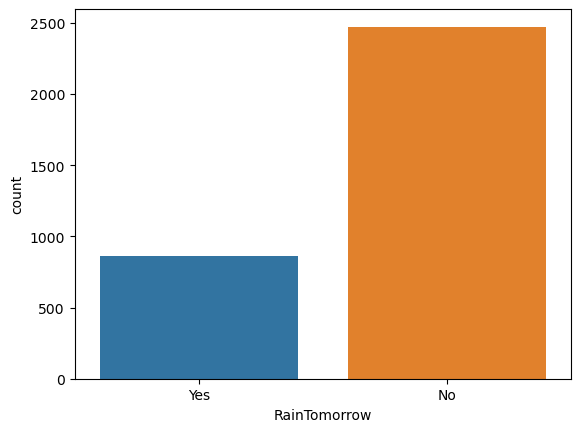

In [11]:
sns.countplot(x='RainTomorrow',data=df1)
#Plot histogram of Location. It Shows little impbalanced data

# Check Outliers in Continous variable before processing null values

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


C:\Users\archa\AppData\Local\Temp\ipykernel_32064\509215780.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4, i + 1)


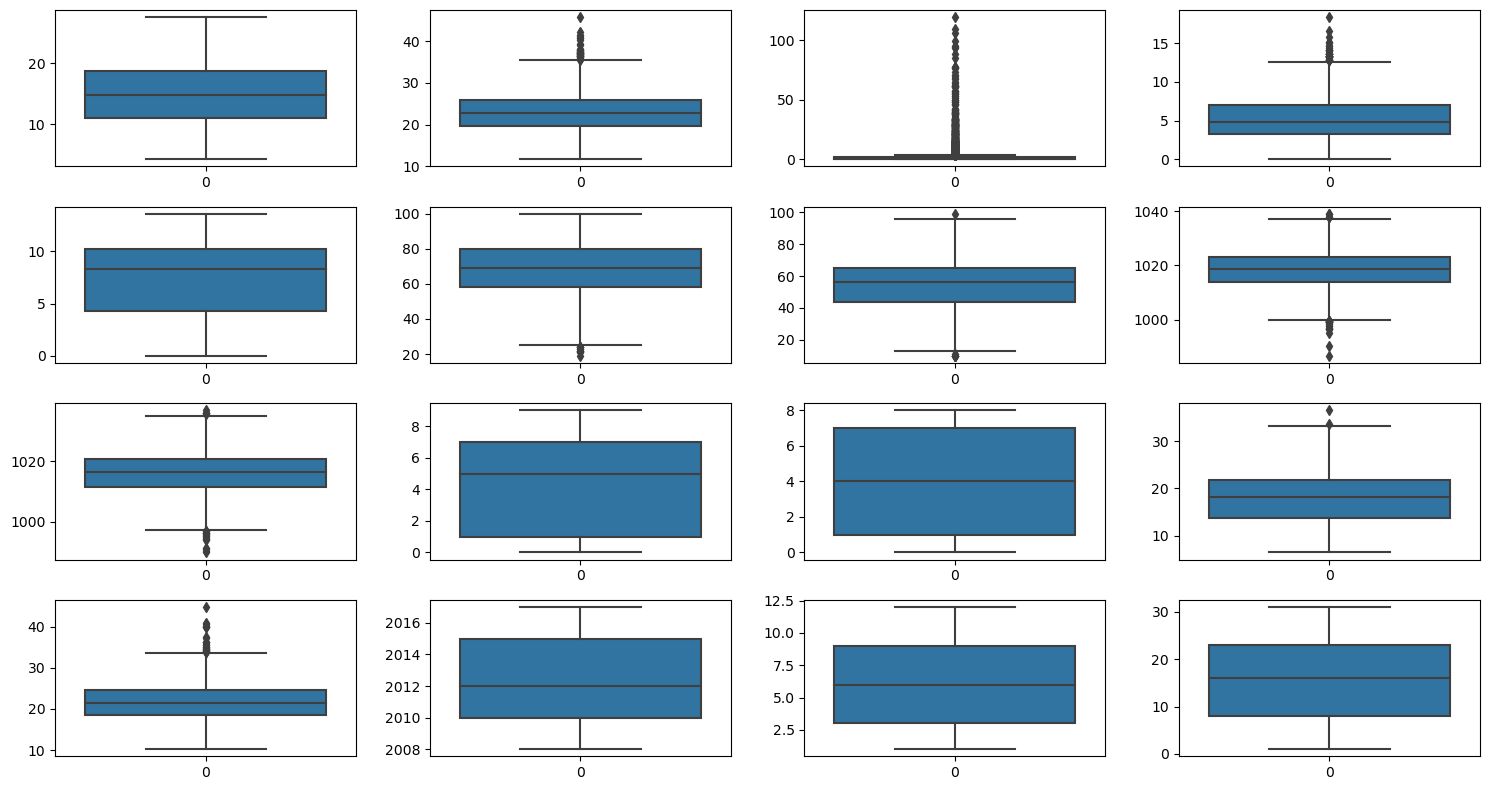

In [12]:
features = list(df1.select_dtypes(include = np.number).columns)
print(features)
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
  plt.subplot(4,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [13]:
# Boxplot of continous variable shows outliers. Hence outliers needs to be replaced 
outliers = ['MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm','Pressure9am', 
            'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in outliers:
    q1 = df1[feature].quantile(0.25)
    q3 = df1[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

In [14]:
# null values are replaced with the mean
feature_numeric = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am',
                   'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for feature in feature_numeric:
    df1[feature].fillna(df1[feature].mean(),inplace=True)


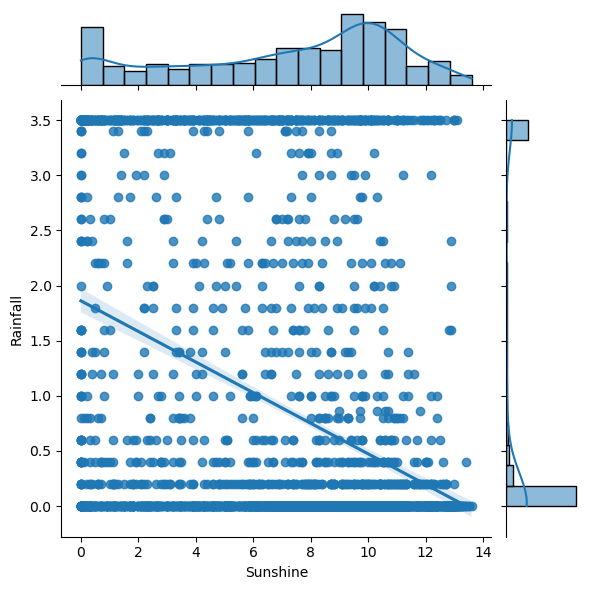

In [15]:
#Bivariate Analysis
#check corelation in sunshine and reainfall
sns.jointplot(x='Sunshine',y='Rainfall',data=df1,kind='reg')
#Negative Corelation, Rainfall decreases as sunshine inreases

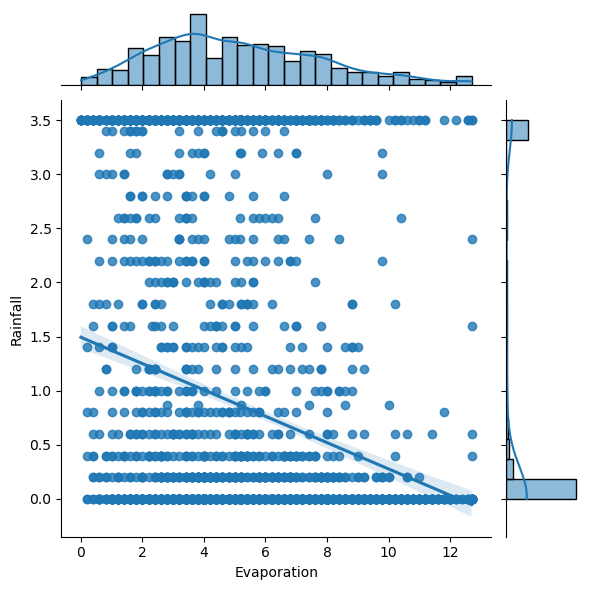

In [16]:
#Bivariate Analysis
#check corelation in Evaporation and reainfall
sns.jointplot(x='Evaporation',y='Rainfall',data=df1,kind='reg')
#Negative Corelation, Rainfall decreases as Evaporation inreases

<Axes: >

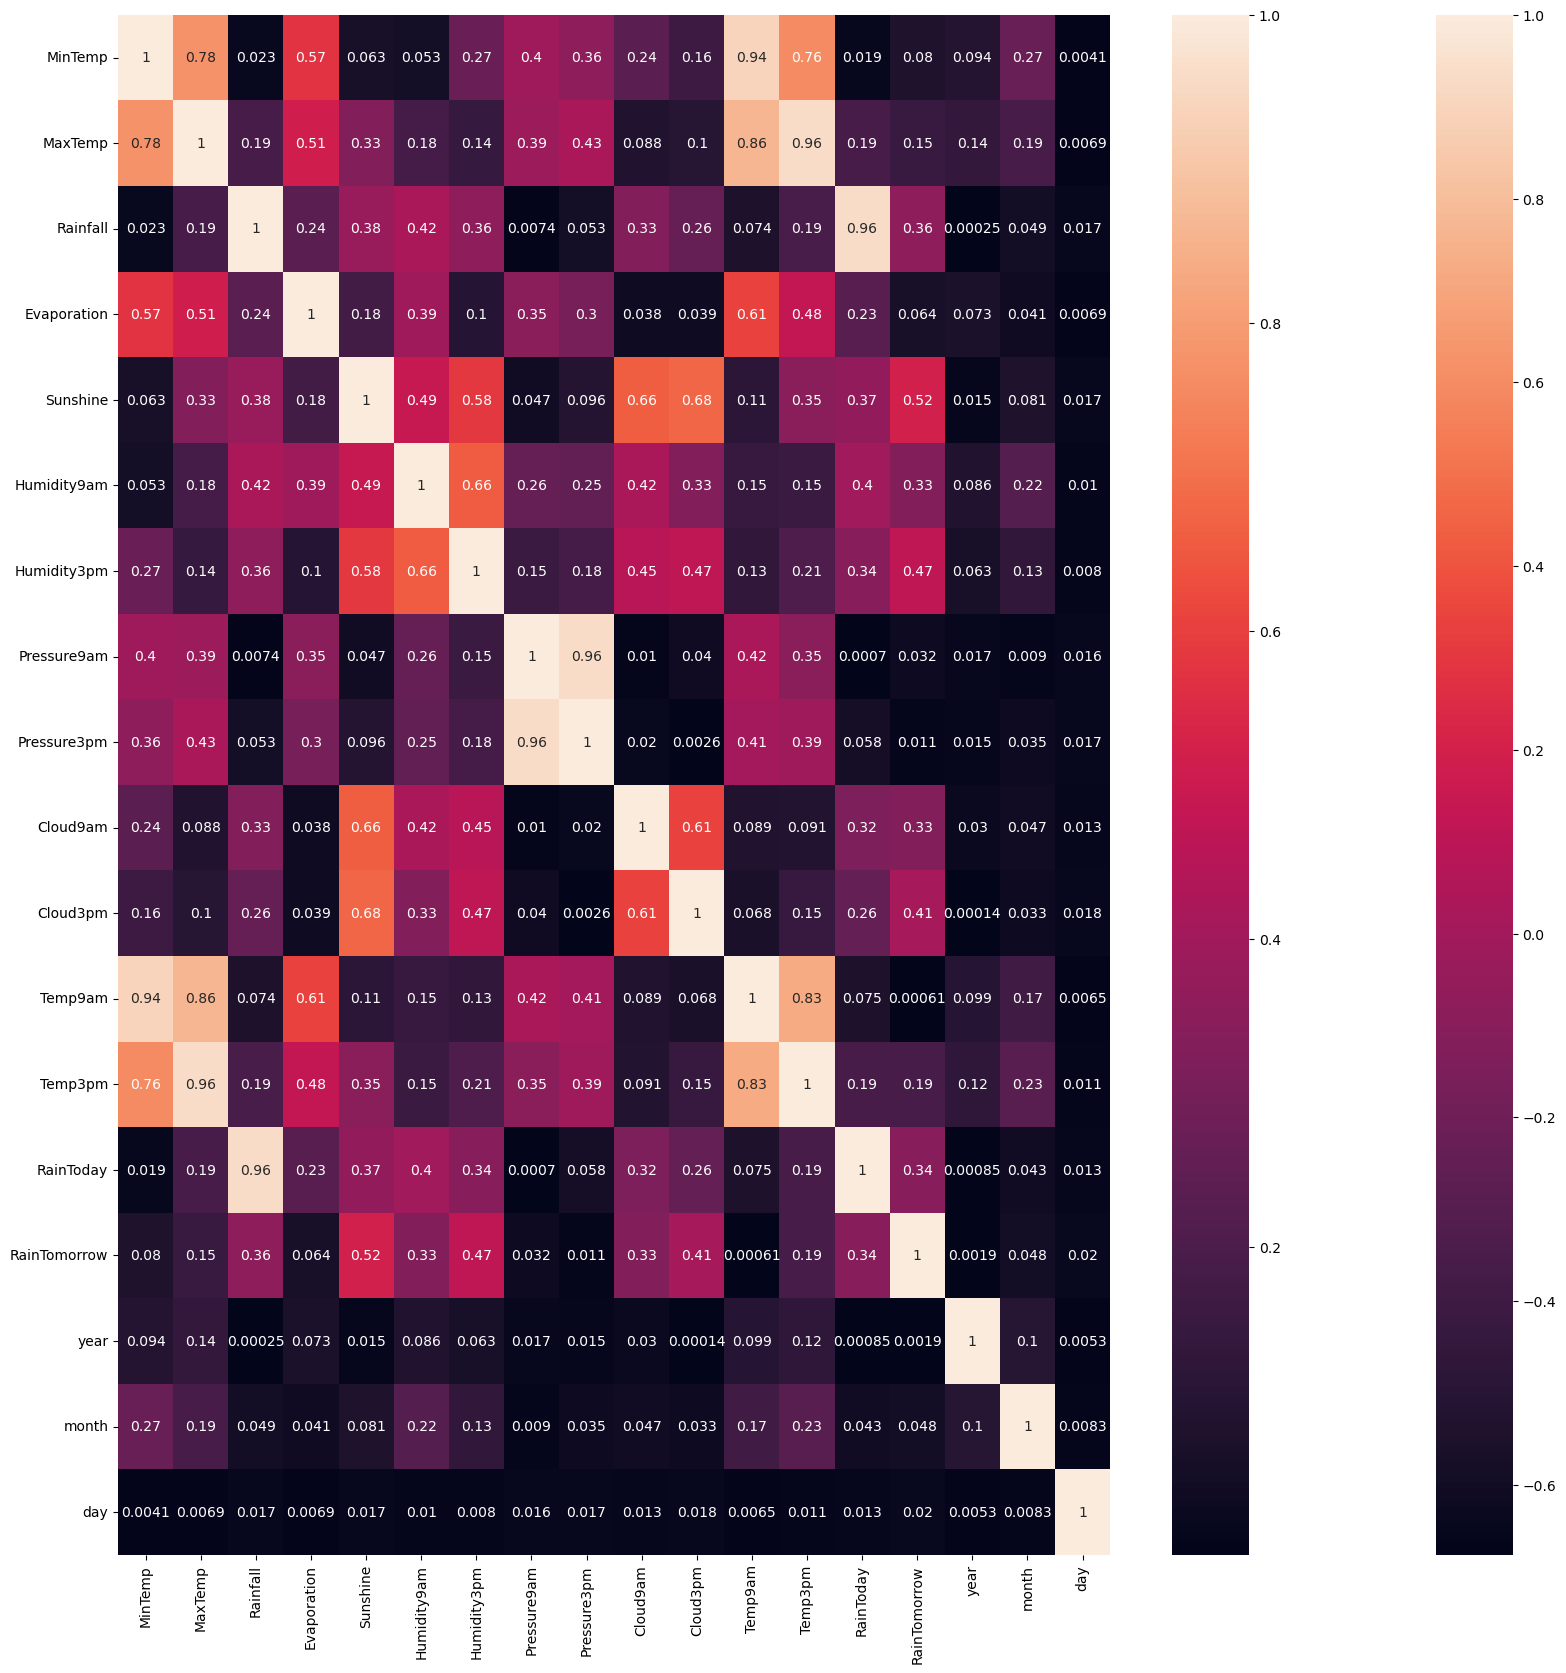

In [17]:
#convert RainToday and RainTomorrow to numerical data
df1['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df1['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
#Check corelations and multicolinearity
plt.figure(figsize=(20,20)) 
sns.heatmap(df1.corr())
sns.heatmap(df1.corr().abs(),annot=True)

In [18]:
#Their exists High multicolinearity Temp9am, Temp3pm, RainToday, Pressure 3pm, Pressure 9am .
#accordingly some variables can be omitted if model overfits (Trainiang accuracy is high and test accuracy is low)

# Identify Dependent and Independent Features

In [19]:
X=df1.drop('RainTomorrow',axis=1)
y=df1['RainTomorrow']

In [20]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#Normalize data as data has different range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistics Regression(Not a Ensemble Method) 

In [22]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
print('Training Recall Score=',recall_score(y_train, lr.predict(X_train)))
print('Training precision Score=',precision_score(y_train, lr.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, lr.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, lr.predict(X_train)))
print('Training Confusion Matrix',confusion_matrix(y_train, lr.predict(X_train)))

print('Testing Recall Score=',recall_score(y_test, lr.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, lr.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, lr.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, lr.predict(X_test)))

print('Testing Confusion Matrix',confusion_matrix(y_test, lr.predict(X_test)))


Training Recall Score= 0.5785007072135785
Training precision Score= 0.7449908925318761
Training roc_auc Score= 0.7535724738922122
Training Accuracy Score 0.8358935931060322
Training Confusion Matrix [[1822  140]
 [ 298  409]]
Testing Recall Score= 0.5
Testing precision Score= 0.6929824561403509
Testing roc_auc Score= 0.7156862745098039
Testing Accuracy Score 0.8293413173652695
Testing Confusion Matrix [[475  35]
 [ 79  79]]


In [24]:
#Initialize list for storing results as modell name, ROC Score, Accuracy Score etc
Model=[]
Training_recall_score=[]
Training_precision_score=[]
Training_roc_auc_score=[]
Training_Accuracy_score=[]
Train_TP=[]
Train_TN=[]
Train_FP=[]
Train_FN=[]


Test_recall_score=[]
Test_precision_score=[]
Test_roc_auc_score=[]
Test_Accuracy_score=[]
Test_TP=[]
Test_TN=[]
Test_FP=[]
Test_FN=[]

Model.append('Logistic Regression')
Training_recall_score.append(recall_score(y_train, lr.predict(X_train)))
Training_precision_score.append(precision_score(y_train, lr.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, lr.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, lr.predict(X_train)))
Test_recall_score.append(recall_score(y_test, lr.predict(X_test)))
Test_precision_score.append(precision_score(y_test, lr.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, lr.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_train, lr.predict(X_train)))

CM=confusion_matrix(y_train, lr.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, lr.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  



# LDA(Not a Ensemble Method) 

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print('Training Recall Score=',recall_score(y_train, lda.predict(X_train)))
print('Training precision Score=',precision_score(y_train, lda.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, lda.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, lda.predict(X_train)))
print('Training Confusion Matrix')
print(confusion_matrix(y_train, lda.predict(X_train)))

print('Testing Recall Score=',recall_score(y_test, lda.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, lda.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, lda.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, lda.predict(X_test)))

print('Testing Confusion Matrix')
print(confusion_matrix(y_test, lda.predict(X_test)))


Model.append('LDA')
Training_recall_score.append(recall_score(y_train, lda.predict(X_train)))
Training_precision_score.append(precision_score(y_train, lda.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, lda.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, lda.predict(X_train)))

Test_recall_score.append(recall_score(y_test, lda.predict(X_test)))
Test_precision_score.append(precision_score(y_test, lda.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, lda.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_train, lda.predict(X_train)))

CM=confusion_matrix(y_train, lda.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, lda.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


Training Recall Score= 0.5968882602545968
Training precision Score= 0.7250859106529209
Training roc_auc Score= 0.7576694104534962
Training Accuracy Score 0.8332708879730236
Training Confusion Matrix
[[1802  160]
 [ 285  422]]
Testing Recall Score= 0.5569620253164557
Testing precision Score= 0.6875
Testing roc_auc Score= 0.739265326383718
Testing Accuracy Score 0.8353293413173652
Testing Confusion Matrix
[[470  40]
 [ 70  88]]


# KNN(Not an ensamble Method)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)
grid_search_cv.fit(X_train_s, y_train)
grid_search_cv.best_params_


{'n_neighbors': 7}

In [31]:
optimised_KNN = grid_search_cv.best_estimator_

print('Training Recall Score=',recall_score(y_train, optimised_KNN.predict(X_train_s)))
print('Training precision Score=',precision_score(y_train, optimised_KNN.predict(X_train_s)))
print('Training roc_auc Score=',roc_auc_score(y_train, optimised_KNN.predict(X_train_s)))
print('Training Accuracy Score',accuracy_score(y_train, optimised_KNN.predict(X_train_s)))
print('Training Confusion Matrix',confusion_matrix(y_train, optimised_KNN.predict(X_train_s)))

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

print('Testing Recall Score=',recall_score(y_test, optimised_KNN.predict(X_test_s)))
print('Testing precision Score=',precision_score(y_test, optimised_KNN.predict(X_test_s)))
print('Testing roc_auc Score=',roc_auc_score(y_test, optimised_KNN.predict(X_test_s)))
print('Testing Accuracy Score',accuracy_score(y_test, optimised_KNN.predict(X_test_s)))

print('Testing Confusion Matrix')
print(confusion_matrix(y_test, optimised_KNN.predict(X_test_s)))



Model.append('KNN')
Training_recall_score.append(recall_score(y_train, optimised_KNN.predict(X_train_s)))
Training_precision_score.append(precision_score(y_train, optimised_KNN.predict(X_train_s)))
Training_roc_auc_score.append(roc_auc_score(y_train, optimised_KNN.predict(X_train_s)))
Training_Accuracy_score.append(accuracy_score(y_train, optimised_KNN.predict(X_train_s)))


Test_recall_score.append(recall_score(y_test, optimised_KNN.predict(X_test_s)))
Test_precision_score.append(precision_score(y_test, optimised_KNN.predict(X_test_s)))
Test_roc_auc_score.append(roc_auc_score(y_test, optimised_KNN.predict(X_test_s)))
Test_Accuracy_score.append(accuracy_score(y_test, optimised_KNN.predict(X_test_s)))

CM=confusion_matrix(y_train, optimised_KNN.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, optimised_KNN.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


Training Recall Score= 0.57991513437058
Training precision Score= 0.803921568627451
Training roc_auc Score= 0.7644733673891636
Training Accuracy Score 0.8512551517422255
Training Confusion Matrix [[1862  100]
 [ 297  410]]
Testing Recall Score= 0.46835443037974683
Testing precision Score= 0.6065573770491803
Testing roc_auc Score= 0.6871183916604616
Testing Accuracy Score 0.8023952095808383
Testing Confusion Matrix
[[462  48]
 [ 84  74]]


# Decision Tree(Not an ensamble method)

In [32]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(X_train, y_train)
print('Training Recall Score=',recall_score(y_train, clftree.predict(X_train)))
print('Training precision Score=',precision_score(y_train, clftree.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, clftree.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, clftree.predict(X_train)))
print('Training Confusion Matrix',confusion_matrix(y_train, clftree.predict(X_train)))
print('Testing Recall Score=',recall_score(y_test, clftree.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, clftree.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, clftree.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, clftree.predict(X_test)))
print('Testing Confusion Matrix',confusion_matrix(y_test, clftree.predict(X_test)))


Model.append('Decision Tree')
Training_recall_score.append(recall_score(y_train, clftree.predict(X_train)))
Training_precision_score.append(precision_score(y_train, clftree.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, clftree.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, clftree.predict(X_train)))


Test_recall_score.append(recall_score(y_test, clftree.predict(X_test)))
Test_precision_score.append(precision_score(y_test, clftree.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, clftree.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, clftree.predict(X_test)))

CM=confusion_matrix(y_train, clftree.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, clftree.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  

Training Recall Score= 0.6053748231966054
Training precision Score= 0.6982055464926591
Training roc_auc Score= 0.7555416419754688
Training Accuracy Score 0.8261521168977145
Training Confusion Matrix [[1777  185]
 [ 279  428]]
Testing Recall Score= 0.5379746835443038
Testing precision Score= 0.6159420289855072
Testing roc_auc Score= 0.7170265574584264
Testing Accuracy Score 0.811377245508982
Testing Confusion Matrix [[457  53]
 [ 73  85]]


In [33]:
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2008,2,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2008,2,2
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,2008,2,3
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,2008,2,4
4,19.7,25.7,3.5,5.174194,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,2008,2,5


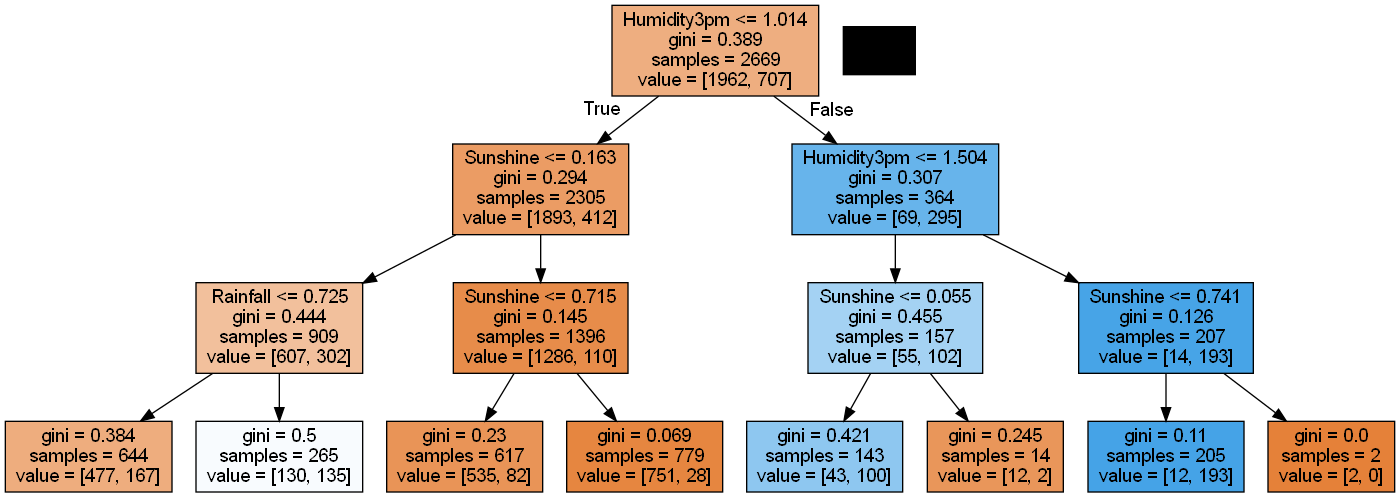

In [36]:
#Displaying decision Tree
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X.columns, filled = True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Decision Tree Bagging(Ensamble Technique)

In [37]:
from sklearn import tree
clftree_b = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(X_train, y_train)

print('Training Recall Score=',recall_score(y_train, bag_clf.predict(X_train)))
print('Training precision Score=',precision_score(y_train, bag_clf.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, bag_clf.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, bag_clf.predict(X_train)))
print('Training Confusion Matrix')
print(confusion_matrix(y_train, bag_clf.predict(X_train)))

print('Testing Recall Score=',recall_score(y_test, bag_clf.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, bag_clf.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, bag_clf.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, bag_clf.predict(X_test)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, bag_clf.predict(X_test)))


Model.append('Decision Tree with Bagging')
Training_recall_score.append(recall_score(y_train, bag_clf.predict(X_train)))
Training_precision_score.append(precision_score(y_train, bag_clf.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, bag_clf.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, bag_clf.predict(X_train)))


Test_recall_score.append(recall_score(y_test, bag_clf.predict(X_test)))
Test_precision_score.append(precision_score(y_test, bag_clf.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, bag_clf.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, bag_clf.predict(X_test)))

CM=confusion_matrix(y_train, bag_clf.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, bag_clf.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


C:\Users\archa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Recall Score= 0.5106082036775106
Training precision Score= 0.8130630630630631
Training roc_auc Score= 0.7341522160079703
Training Accuracy Score 0.8392656425627576
Training Confusion Matrix
[[1879   83]
 [ 346  361]]
Testing Recall Score= 0.4810126582278481
Testing precision Score= 0.7524752475247525
Testing roc_auc Score= 0.7159965251923553
Testing Accuracy Score 0.8398203592814372
Testing Confusion Matrix
[[485  25]
 [ 82  76]]


# Random Forest (Ensamble Technique)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

params_grid = {"max_features" : [4,5,6,7,8,9,10],"min_samples_split": [2, 3, 10],}
grid_search = GridSearchCV(rf_clf, params_grid,n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('best parameter',grid_search.best_params_)
cvrf_clf = grid_search.best_estimator_
print('Training Recall Score=',recall_score(y_train, cvrf_clf.predict(X_train)))
print('Training precision Score=',precision_score(y_train, cvrf_clf.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, cvrf_clf.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, cvrf_clf.predict(X_train)))
print('Training Confusion Matrix')
print(confusion_matrix(y_train, cvrf_clf.predict(X_train)))

print('Testing Recall Score=',recall_score(y_test, cvrf_clf.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, cvrf_clf.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, cvrf_clf.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, cvrf_clf.predict(X_test)))
print('Testing Confusion Matrix',confusion_matrix(y_test, cvrf_clf.predict(X_test)))


Model.append('Random Forest')
Training_recall_score.append(recall_score(y_train, cvrf_clf.predict(X_train)))
Training_precision_score.append(precision_score(y_train, cvrf_clf.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, cvrf_clf.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, cvrf_clf.predict(X_train)))


Test_recall_score.append(recall_score(y_test, cvrf_clf.predict(X_test)))
Test_precision_score.append(precision_score(y_test, cvrf_clf.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, cvrf_clf.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, cvrf_clf.predict(X_test)))

CM=confusion_matrix(y_train, cvrf_clf.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, cvrf_clf.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


best parameter {'max_features': 6, 'min_samples_split': 10}
Training Recall Score= 0.8585572842998586
Training precision Score= 0.9806138933764136
Training roc_auc Score= 0.9262205381743941
Training Accuracy Score 0.9580367178718622
Training Confusion Matrix
[[1950   12]
 [ 100  607]]
Testing Recall Score= 0.5
Testing precision Score= 0.6991150442477876
Testing roc_auc Score= 0.7166666666666667
Testing Accuracy Score 0.8308383233532934
Testing Confusion Matrix [[476  34]
 [ 79  79]]


# Gradient Boosting(Ensamble Technique)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
params_grid = {"max_features" : [5,6,7,8,9,10],"min_samples_split": [2, 3, 10],}
gb_clf = GradientBoostingClassifier(n_estimators=250, random_state=42)
grid_search = GridSearchCV(gb_clf, params_grid,n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('best parameter',grid_search.best_params_)
cvgb_clf = grid_search.best_estimator_

print('Training Recall Score=',recall_score(y_train, cvgb_clf.predict(X_train)))
print('Training precision Score=',precision_score(y_train, cvgb_clf.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, cvgb_clf.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, cvgb_clf.predict(X_train)))
print('Training Confusion Matrix')
print(confusion_matrix(y_train, cvgb_clf.predict(X_train)))
print('Testing Recall Score=',recall_score(y_test, cvgb_clf.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, cvgb_clf.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, cvgb_clf.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, cvgb_clf.predict(X_test)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, cvgb_clf.predict(X_test)))


Model.append('Gradient Boost')
Training_recall_score.append(recall_score(y_train, cvgb_clf.predict(X_train)))
Training_precision_score.append(precision_score(y_train, cvgb_clf.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, cvgb_clf.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, cvgb_clf.predict(X_train)))


Test_recall_score.append(recall_score(y_test, cvgb_clf.predict(X_test)))
Test_precision_score.append(precision_score(y_test, cvgb_clf.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, cvgb_clf.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, cvgb_clf.predict(X_test)))

CM=confusion_matrix(y_train, cvgb_clf.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, cvgb_clf.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


best parameter {'max_features': 8, 'min_samples_split': 2}
Training Recall Score= 0.7468175388967468
Training precision Score= 0.9378330373001776
Training roc_auc Score= 0.8644892995197292
Training Accuracy Score 0.9198201573623079
Training Confusion Matrix
[[1927   35]
 [ 179  528]]
Testing Recall Score= 0.5126582278481012
Testing precision Score= 0.7168141592920354
Testing roc_auc Score= 0.7249565649044428
Testing Accuracy Score 0.8368263473053892
Testing Confusion Matrix
[[478  32]
 [ 77  81]]


# Adaboost Classifier

In [41]:
#pending
from sklearn.ensemble import AdaBoostClassifier
params_grid = { 'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]}


adb_clf = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(adb_clf, params_grid,n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('best parameter',grid_search.best_params_)
adb_clf = grid_search.best_estimator_

print('Training Recall Score=',recall_score(y_train, adb_clf.predict(X_train)))
print('Training precision Score=',precision_score(y_train, adb_clf.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, adb_clf.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, adb_clf.predict(X_train)))
print('Training Confusion Matrix',confusion_matrix(y_train, adb_clf.predict(X_train)))
print('Testing Recall Score=',recall_score(y_test, adb_clf.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, adb_clf.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, adb_clf.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, adb_clf.predict(X_test)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, adb_clf.predict(X_test)))


Model.append('Ada Boost Classifier')
Training_recall_score.append(recall_score(y_train, adb_clf.predict(X_train)))
Training_precision_score.append(precision_score(y_train, adb_clf.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, adb_clf.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, adb_clf.predict(X_train)))


Test_recall_score.append(recall_score(y_test, adb_clf.predict(X_test)))
Test_precision_score.append(precision_score(y_test, adb_clf.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, adb_clf.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, adb_clf.predict(X_test)))

CM=confusion_matrix(y_train, adb_clf.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, adb_clf.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


best parameter {'learning_rate': 0.2, 'n_estimators': 100}
Training Recall Score= 0.5431400282885431
Training precision Score= 0.8118393234672304
Training roc_auc Score= 0.7488890763257191
Training Accuracy Score 0.84563506931435
Training Confusion Matrix [[1873   89]
 [ 323  384]]
Testing Recall Score= 0.4810126582278481
Testing precision Score= 0.7524752475247525
Testing roc_auc Score= 0.7159965251923553
Testing Accuracy Score 0.8398203592814372
Testing Confusion Matrix
[[485  25]
 [ 82  76]]


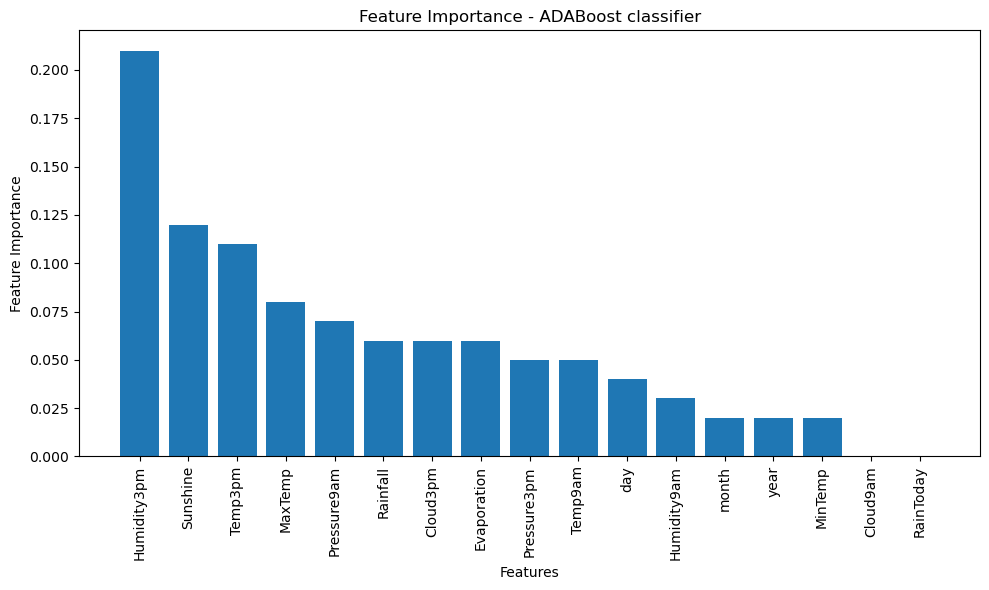

In [43]:
#plot important features
feature_importances = adb_clf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost classifier")
plt.tight_layout()
plt.show()


# XGboost Classifier

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'max_depth': 9, 'reg_alpha': 1, 'subsample': 0.8}
Training Recall Score= 1.0
Training precision Score= 1.0
Training roc_auc Score= 1.0
Training Accuracy Score 1.0
Training Confusion Matrix
[[1962    0]
 [   0  707]]
Testing Recall Score= 0.5379746835443038
Testing precision Score= 0.6967213114754098
Testing roc_auc Score= 0.7327128319682303
Testing Accuracy Score 0.8353293413173652
Testing Confusion Matrix
[[473  37]
 [ 73  85]]


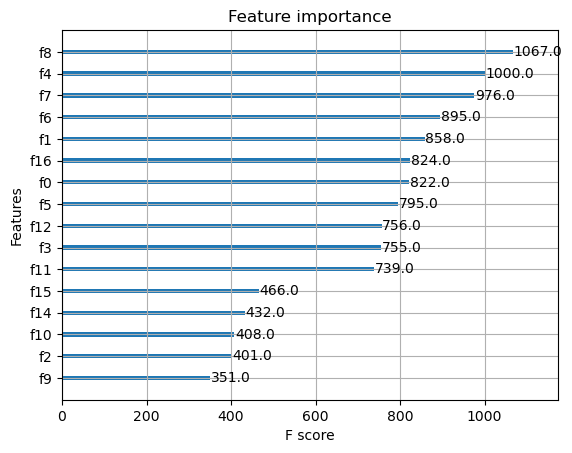

In [44]:
#plot important features
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, n_jobs=-1)
xgb_clf.fit(X_train, y_train)
xgb.plot_importance(xgb_clf)

param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_XGboost_model = grid_search.best_estimator_
print('Training Recall Score=',recall_score(y_train, best_XGboost_model.predict(X_train)))
print('Training precision Score=',precision_score(y_train, best_XGboost_model.predict(X_train)))
print('Training roc_auc Score=',roc_auc_score(y_train, best_XGboost_model.predict(X_train)))
print('Training Accuracy Score',accuracy_score(y_train, best_XGboost_model.predict(X_train)))
print('Training Confusion Matrix')
print(confusion_matrix(y_train, best_XGboost_model.predict(X_train)))

print('Testing Recall Score=',recall_score(y_test, best_XGboost_model.predict(X_test)))
print('Testing precision Score=',precision_score(y_test, best_XGboost_model.predict(X_test)))
print('Testing roc_auc Score=',roc_auc_score(y_test, best_XGboost_model.predict(X_test)))
print('Testing Accuracy Score',accuracy_score(y_test, best_XGboost_model.predict(X_test)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, best_XGboost_model.predict(X_test)))


Model.append('XGBoost Classifier')
Training_recall_score.append(recall_score(y_train, best_XGboost_model.predict(X_train)))
Training_precision_score.append(precision_score(y_train, best_XGboost_model.predict(X_train)))
Training_roc_auc_score.append(roc_auc_score(y_train, best_XGboost_model.predict(X_train)))
Training_Accuracy_score.append(accuracy_score(y_train, best_XGboost_model.predict(X_train)))


Test_recall_score.append(recall_score(y_test, best_XGboost_model.predict(X_test)))
Test_precision_score.append(precision_score(y_test, best_XGboost_model.predict(X_test)))
Test_roc_auc_score.append(roc_auc_score(y_test, best_XGboost_model.predict(X_test)))
Test_Accuracy_score.append(accuracy_score(y_test, best_XGboost_model.predict(X_test)))
CM=confusion_matrix(y_train, best_XGboost_model.predict(X_train))
Train_TP.append(CM[1][1])                  
Train_TN.append(CM[0][0])                  
Train_FN.append(CM[1][0])                  
Train_FP.append(CM[0][1])   
CM=confusion_matrix(y_test, best_XGboost_model.predict(X_test))
Test_TP.append(CM[1][1])                  
Test_TN.append(CM[0][0])                  
Test_FN.append(CM[1][0])                  
Test_FP.append(CM[0][1])                  


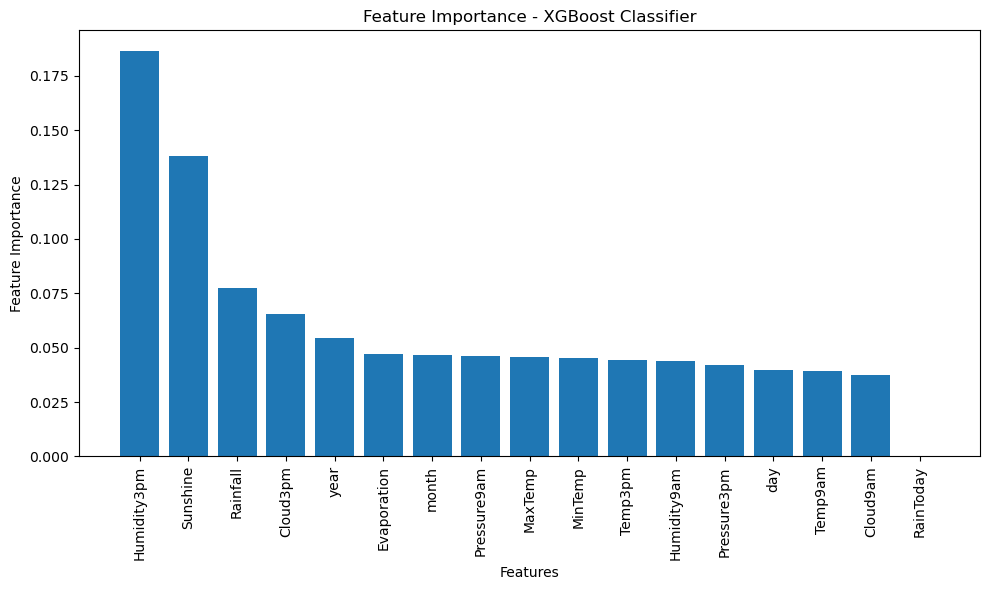

In [45]:
feature_importances = xgb_clf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - XGBoost Classifier")
plt.tight_layout()
plt.show()


In [46]:
#Various Models and their RMS and R2 Score values are compared
Result={'Model':Model,'Training_recall_score':Training_recall_score,
        'Training_precision_score':Training_precision_score, 'Training_roc_auc_score':Training_roc_auc_score,
        'Training_Accuracy_score':Training_Accuracy_score, 'Test_recall_score':Test_recall_score,
        'Test_precision_score':Test_precision_score, 'Test_roc_auc_score':Test_roc_auc_score,
        'Test_Accuracy_score':Test_Accuracy_score,'Train_TP':Train_TP,'Train_TN':Train_FN,
        'Train_FP': Train_FP,'Test_TP':Test_TP,'Test_TN':Test_TN,'Test_FN':Test_FN,'Test_FP':Test_FP,}


In [47]:
print(pd.DataFrame(Result))

                         Model  Training_recall_score  \
0          Logistic Regression               0.578501   
1                          LDA               0.596888   
2                          KNN               0.579915   
3                          LDA               0.596888   
4                          KNN               0.579915   
5                          KNN               0.579915   
6                Decision Tree               0.605375   
7   Decision Tree with Bagging               0.510608   
8   Decision Tree with Bagging               0.510608   
9                Random Forest               0.858557   
10              Gradient Boost               0.746818   
11        Ada Boost Classifier               0.543140   
12          XGBoost Classifier               1.000000   

    Training_precision_score  Training_roc_auc_score  Training_Accuracy_score  \
0                   0.744991                0.753572                 0.835894   
1                   0.725086           

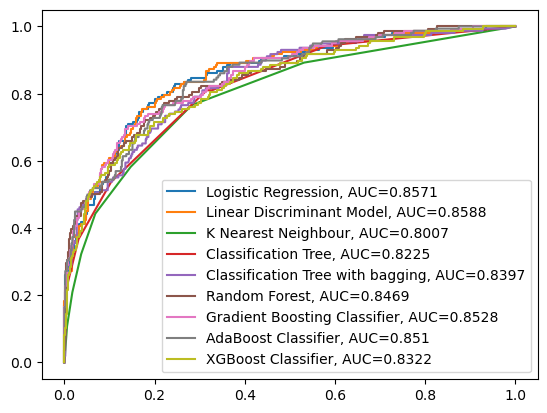

In [57]:
#plot ROC curve for logistic regression model 
y_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#plot ROC curve for Linear Discriminant Model 
y_pred = lda.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Linear Discriminant Model, AUC="+str(auc))

#plot ROC curve for K Nearest Neighbour 
y_pred = optimised_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="K Nearest Neighbour, AUC="+str(auc))

#plot ROC curve for Classification Tree 
y_pred = clftree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Classification Tree, AUC="+str(auc))

#plot ROC curve for Classification Tree with bagging
y_pred = bag_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Classification Tree with bagging, AUC="+str(auc))

#plot ROC curve for Random Forest 
y_pred = cvrf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#plot ROC curve for Gradient Boosting Classifier
y_pred = cvgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting Classifier, AUC="+str(auc))

#plot ROC curve for AdaBoost Classifier
y_pred = adb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost Classifier, AUC="+str(auc))

#plot ROC curve for XGBoost Classifier
y_pred = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost Classifier, AUC="+str(auc))

#add legend
plt.legend()